## Decision Tree Classification

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

## Reading CSV

In [46]:
df=pd.read_csv("PlayTennis/PlayTennis.csv")
df.head()
df.shape

(14, 5)

In [47]:
# Convert categorical features to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Outlook', 'Temperature', 'Humidity', 'Wind'])

# Separate features and target variable
X = df.drop('Play Tennis', axis=1)
y = df['Play Tennis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Decision Tree

In [48]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Default value of criteria of division = gini index

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [49]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


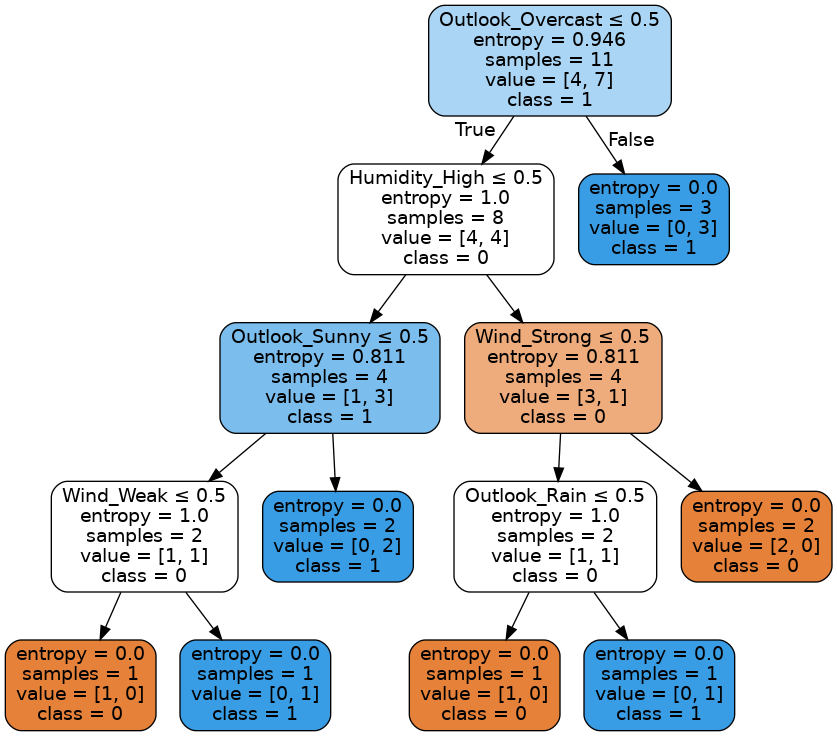

In [45]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

# Plotting decision tree 
features = ['Outlook_Overcast','Outlook_Rain','Outlook_Sunny','Temperature_Cool','Temperature_Hot','Temperature_Mild','Humidity_High','Humidity_Normal','Wind_Strong','Wind_Weak']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('play_tennis_decision_tree.png')
Image(graph.create_png())

## Decision Tree Classifier using entropy

In [42]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


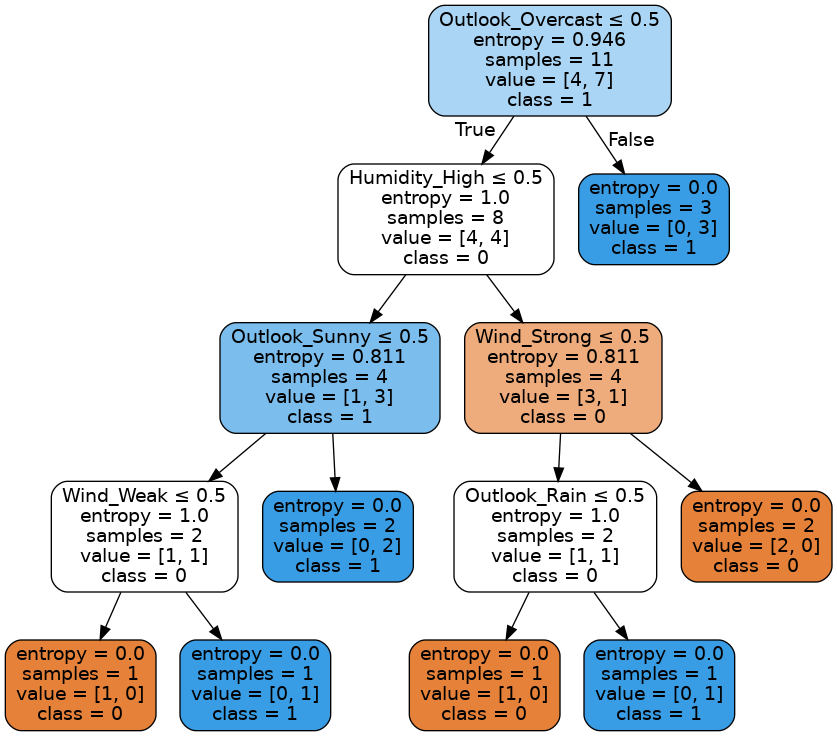

In [43]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

features = ['Outlook_Overcast','Outlook_Rain','Outlook_Sunny','Temperature_Cool','Temperature_Hot','Temperature_Mild','Humidity_High','Humidity_Normal','Wind_Strong','Wind_Weak']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('play_tennis_decision_tree.png')
Image(graph.create_png())